<a href="https://colab.research.google.com/github/Mladen85/GoogleColab/blob/0003_ML_KNearestNeighbours/MachineLearning_KNearestNeighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Nearest Neighbours**
Example how to implement K-Nearest Neighbours algorithm in Python using Google Colab sample data.<br/>
Since sample data is already copied in GoogleColab_DataSetExample project, files will be used from this folder.

##**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


##**Copy data sample from Google Drive to Colab working dir**

In [ ]:
!cp gdrive/MyDrive/Colab/GoogleColab_DataSetExample/anscombe.json .

##**Import needed libraries for KNN**
`numpy` is imported for math operation on arrays.

`pandas` is imported to load data from .json or .csv file.

`sklearn datasets` is imported to import dataset for testing.

`train_test_split` is imported for ...

`matplotlib` is imported to show graphs.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

##**Load dataset for training**
As example [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset can be loaded from `sklearn.datasets`.

In [ ]:
iris = datasets.load_iris()
#print(iris)
X_iris, y_iris = iris.data, iris.target
print(f"X_iris length: {len(X_iris)}")
print(f"y_iris length: {len(y_iris)}")
#print("X_iris: \n", X_iris)
#print("y_iris: \n", y_iris)

X_iris length: 150
y_iris length: 150


For this project Google Colab sample data from `anscombe.json` will be used.

As backup, here is saved code how I tried to convert data from dataframe to numpy array:
```
df_pandas = pd.read_json("anscombe.json")
dat1, dat2 = df_pandas["X"], df_pandas["Y"]
#dat1.values, dat2.values
print(len(dat1), len(dat2))
X1 = np.array(dat1)
X2 = np.array(dat2)
#print(X1, '\n', X2)
X = np.concatenate([X1[:,None],X2[:,None]], axis=1)
#print(X)
```

Convert target data (y) to int.

Here I left how I initialy did, but easier way is to directly convert Series column to category object type.

Example how to do this is [here](https://colab.research.google.com/drive/1OioPTj8d7kjO_DxtpqpeAaLDNyBn3uW_?authuser=1#scrollTo=kRqqX1kekHrt&line=1&uniqifier=1).

`df_pandas.info()` prints types of each column.

`df_pandas["Series"] = df_pandas["Series"].astype("category")` converts type of "Series" column (that is at this moment unknow type, object) to category type (0, 1, 2...).

In [ ]:
df_pandas = pd.read_json("anscombe.json")
X = df_pandas[['X','Y']].to_numpy()
y = df_pandas["Series"].to_numpy()
#print(type(y))
y[y == 'I'] = int(0)
y[y == 'II'] = int(1)
y[y == 'III'] = int(2)
y[y == 'IV'] = int(3)
#print(type(y))
#print(f"X: \n{X}\n")
#print(f"y: \n{y}\n")

##**Split data and target to train and test data**
`train_test_split` function is used to split data (randomly) to train and target data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
#print(X_train, X_test, y_train, y_test)

##**Plot data**

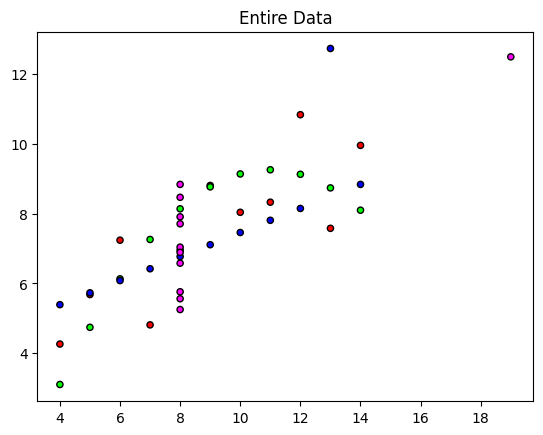

In [ ]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF','#FF00FF'])
plt.rcParams['figure.figsize'] = (6.4, 4.8)
plt.figure()
plt.title("Entire Data")
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap,edgecolor='k',s=20)
plt.show()

##**Conclusion for *anscombe.json* file after ploting data**

After analysing plot data, it is concluded that this data is not sutable for KNN algorithm because points are not grouped so that KNN could be performed correctly.

For education purpose, this data will be used to see how KNN algorithm performs with this kind of data.

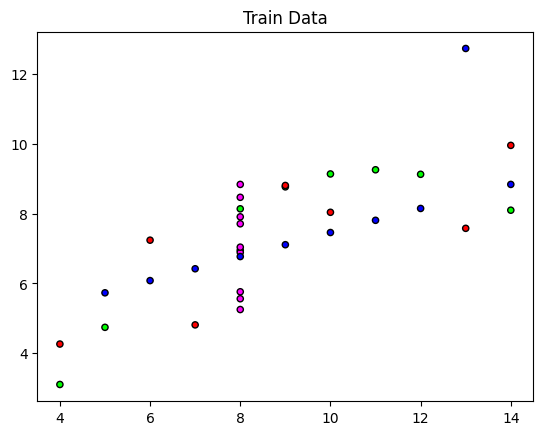

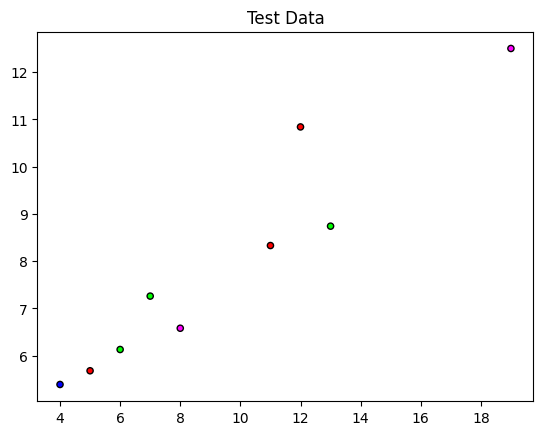

In [ ]:
plt.figure()
plt.title("Train Data")
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=cmap,edgecolor='k',s=20,)
plt.show()
print()
plt.figure()
plt.title("Test Data")
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=cmap,edgecolor='k',s=20)
plt.show()


##**Euclidean plane distance**
Euclidean plane is Euclidean space of dimension 2.

Create helper function for calculating distance in Euclidean plane.

Inputs are two 1d arrays of same size.

In [ ]:
def euclidian_plane_distance(x1, x2):
  dist = np.sqrt(np.sum((x1 - x2)**2))
  return dist

##**K-Nearest Neighbours class**
KNN class

**Note:**

`np.argsort()` create new array of indexes from original array, after sorting values of original array.

Example:
```
argsort_org_array = np.array([3, 1, 0, 4, 2])
argsort_new_array = np.argsort(argsort_org_array)
argsort_new_array
```
Output:
```
array([2, 1, 4, 0, 3])
```
Explanation:

After sorting original array, sorted array will looklike:

`[0, 1, 2, 3, 4]`.

Indexes of original array in new soretd array are (first value is index, value in brackets is value from original array):

`[2(0), 1(1), 4(2), 0(3), 3(4)]`

In [ ]:
argsort_org_array = np.array([3, 1, 0, 4, 2])
argsort_new_array = np.argsort(argsort_org_array)
argsort_new_array

array([2, 1, 4, 0, 3])

In [ ]:
from collections import Counter

class KNN:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y
  
  def predict(self, X):
    predctions = np.array([self._predict(x) for x in X])
    return predctions
  
  def _predict(self, x):
    # Compute distance
    distances = [euclidian_plane_distance(x, x_train)\
                 for x_train in self.X_train]

    # Get the closest k
    # indices - plural of index
    k_indices = np.argsort(distances)[:self.k] #after sorting distances get the first k elements (smallest indices of sorted distances -> smallest distance)
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    
    # Majority vote
    most_common = Counter(k_nearest_labels).most_common()

    # Return first result from most common 
    return most_common[0][0]

##**Run KNN algorithm**

Create Classifier and run KNN algorithm.



In [ ]:
clf = KNN(10)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

###**Print test and prediceted data**

In [ ]:
print(f"X_test:\n{X_test}")
print(f"y_test:\n{y_test}")
# Prediction is type of list, convert to numpy
print(f"predictions:\n{predictions}")
#print(f"type of predictions: {type(predictions)}")

X_test:
[[ 4.    5.39]
 [ 6.    6.13]
 [ 8.    6.58]
 [19.   12.5 ]
 [12.   10.84]
 [13.    8.74]
 [11.    8.33]
 [ 7.    7.26]
 [ 5.    5.68]]
y_test:
[2 1 3 3 0 1 0 1 0]
predictions:
[2 2 3 2 1 1 1 3 2]


###**Calculate accuracy**

In [ ]:
acc = np.sum(predictions == y_test) / len(y_test)
acc

0.3333333333333333

##**Conclusion**
After comparing y_test and predictions arrays, there are two hits in prediction that maches y_test, and accuracy is 0.2222222222222222 (2/9).

**Note:** After setting number of k points to 10, accuracy is incrised to 0.3333333333333333.

X_test and y_test are values that are randomly shuffled in `train_test_split()` function. For analysing purpose X_test, y_test and predictions are sorted by x-axis, to compare results easily.

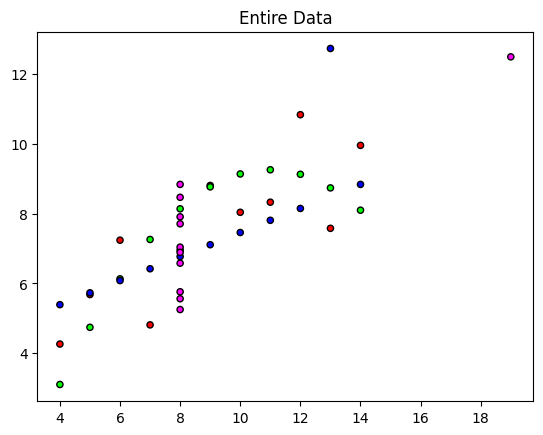

In [ ]:
plt.figure()
plt.title("Entire Data")
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap,edgecolor='k',s=20)
plt.show()

Last two graphs shows that 1st and 5th pointes matches (by color -> dataframe["Series"]).

(**Note:** last point was changed to 0 so that plot would assign value 0 to red and value 1 to green, otherverse if there is no value 0, red will take value 1 and green is not displayed, for some reason.)

This is because `most_common()` function is used.

Same result is achived if second most common value is returned in `KNN._prediction` method (`return most_common[1][0]`).

If there was calculated interpolation line for each series and then compared distance to that line, resoult could be more accurate.



y_test:
[2 1 3 3 0 1 0 1 0]
predictions:
[2 2 3 2 1 1 1 3 2]
y_test_sort_index :
[0 8 1 7 2 6 4 5 3]
y_test_sorted:
[2 0 1 1 3 0 0 1 3]
predictions_test_sorted:
[2 2 2 3 3 1 1 1 2]
predictions_test_sorted (after manualy setting last point to cat 0):
[2 2 2 3 3 1 1 1 0]


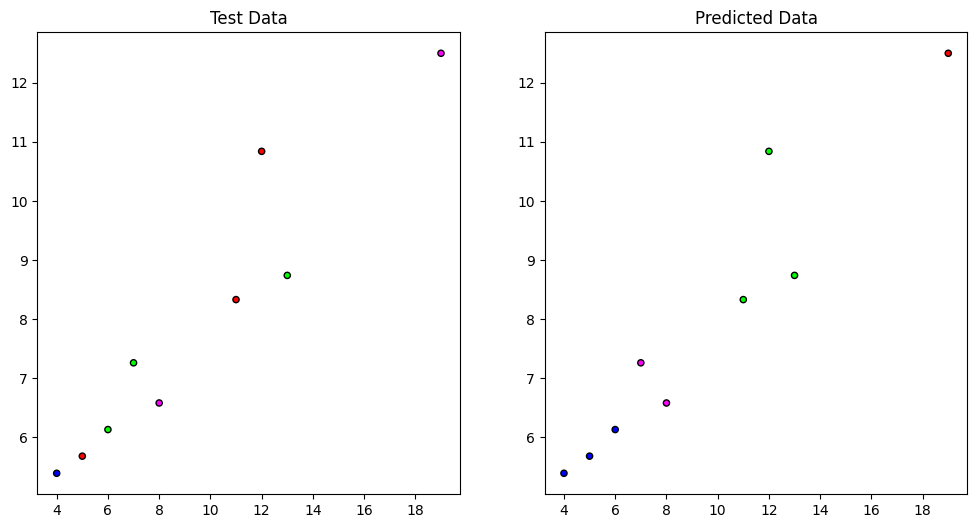

In [ ]:
#y_test_sort_index = np.argsort(X_test,0)
y_test_sort_index = X_test[:,0].argsort()
#print(f"y_test_sort_index :\n{y_test_sort_index}")
#print(f"y_test_sort_index1:\n{y_test_sort_index1}")
#X_test_sorted = np.sort(X_test,0)
# Sort X_test only by first column (columns start with 0)
X_test_sorted = X_test[X_test[:,0].argsort()]
#print(X_test_sorted)
y_test_sorted = np.array([y_test[i] for i in y_test_sort_index])
#print(y_test_sort_index)
predictions_test_sorted = np.array([predictions[i] for i in y_test_sort_index])
print(f"y_test:\n{y_test}")
print(f"predictions:\n{predictions}")
print(f"y_test_sort_index :\n{y_test_sort_index}")
print(f"y_test_sorted:\n{y_test_sorted}")
print(f"predictions_test_sorted:\n{predictions_test_sorted}")
predictions_test_sorted[8] = 0
print(f"predictions_test_sorted (after manualy setting last point to cat 0):\n{predictions_test_sorted}")
#plt.rcParams['figure.figsize'] = (9, 6)
#print(plt.rcParams['figure.figsize']) #output: (6.4, 4.8)
# Set new plot size, from now on all plots will have new size
plt.rcParams['figure.figsize'] = (12, 6)
plt.figure()
# Set subplot within general plot
# plt.sublot(r,c,i) -> r - number of rows, c - number of columns, i - graph index (starts with 1)
plt.subplot(1,2,1)
plt.title("Test Data")
plt.scatter(X_test_sorted[:,0],X_test_sorted[:,1],c=y_test_sorted,cmap=cmap,edgecolor='k',s=20)
#plt.show()
#print()
#plt.figure()
plt.subplot(1,2,2)
plt.title("Predicted Data")
plt.scatter(X_test_sorted[:,0],X_test_sorted[:,1],c=predictions_test_sorted,cmap=cmap,edgecolor='k',s=20)
plt.show()

More examples on [Google Colab ploting](https://colab.research.google.com/drive/1wqIUyStkKbUc4MYPvJgIExPOFvC5cUs2#scrollTo=jyIFbvWqNRpR).

In [ ]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Series  44 non-null     object 
 1   X       44 non-null     int64  
 2   Y       44 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
df_pandas["Series"] = df_pandas["Series"].astype("category")

In [ ]:
df_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Series  44 non-null     category
 1   X       44 non-null     int64   
 2   Y       44 non-null     float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 1.1 KB


In [ ]:
df_pandas.head()

,Series,X,Y
0,0,10,8.04
1,0,8,6.95
2,0,13,7.58
3,0,9,8.81
4,0,11,8.33
